In [1]:
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
sys.path.insert(0, os.path.abspath('..'))
from Simulators.cube_simulator_full import *

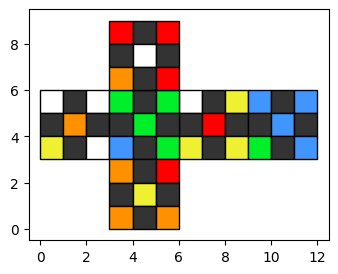

Move history: ufr


In [4]:
class CubeVisualizer2D:
    def __init__(self):
        self.colorizer = CubeColorizer()
        self.fig, self.ax = plt.subplots(figsize=(6, 3))
        self.fig.canvas.manager.set_window_title('Rubik\'s Cube 2D')
        self.is_interactive = plt.isinteractive()
        if not self.is_interactive:
             print("Matplotlib interactive mode OFF. Turning ON.")
             plt.ion()

        self.colors_rgb = {
            "White":  '#FFFFFF', "Yellow": '#F0F033',
            "Blue" :  '#4095FE', "Green" : '#00EF2A',
            "Red"  :  '#FF0000', "Orange": '#FF9000',
            "Black":  '#333333',
        }

        self.grid_positions = {
            'Z': (3, 6),  # White face (Up)
            'x': (0, 3),  # Orange face (Left)
            'y': (3, 3),  # Green face (Front)
            'X': (6, 3),  # Red face (Right)
            'Y': (9, 3),  # Blue face (Back) - Unfolded to the far right
            'z': (3, 0),  # Yellow face (Down)
        }

        

        self.face_to_colors_map = {}
    
    def apply_moves(self, moves):
        self.colorizer.cube_tracker.apply_moves(moves)

    def update_display(self):
        self.ax.clear()
        min_x = min(pos[0] for pos in self.grid_positions.values())
        max_x = max(pos[0] + 3 for pos in self.grid_positions.values()) # Add 3 for width
        min_y = min(pos[1] for pos in self.grid_positions.values())
        max_y = max(pos[1] + 3 for pos in self.grid_positions.values()) # Add 3 for height

        # Apply limits with some padding
        self.ax.set_xlim(min_x - 0.5, max_x + 0.5)
        self.ax.set_ylim(min_y - 0.5, max_y + 0.5)

        # Ensure squares are square
        self.ax.set_aspect('equal', adjustable='box')

        new_colors = self.colorizer.update_colors()
        for direction in ['X', 'x', 'Y', 'y', 'Z', 'z']:
            face_colors = np.full((3, 3), '#000000')
            for piece_ids in self.colorizer.cube_tracker.cube_current_faces_with_ids[direction]:
                for piece_id in piece_ids:
                    face_colors[tuple(np.argwhere(self.colorizer.cube_tracker.cube_current_faces_with_ids[direction]==piece_id)[0])] = new_colors[piece_id][self.colorizer.direction__color_idx_map[direction]]
            self.face_to_colors_map[direction] = face_colors
        
        for direction in ['X', 'x', 'Y', 'y', 'Z', 'z']:
            for i in range(3):
                for j in range(3):
                    color_patch = patches.Rectangle(
                        (self.grid_positions[direction][0]+j, self.grid_positions[direction][1]+2-i),
                        1,1,
                        facecolor=self.colors_rgb[self.face_to_colors_map[direction][i,j]],
                        edgecolor='black',
                        linewidth=1,
                    )
                    self.ax.add_patch(color_patch)

        # Force redraw in interactive mode
        self.fig.canvas.flush_events() # Process UI events
        self.fig.canvas.draw_idle()    # Schedule a redraw if needed
        plt.pause(0.01) # Short pause crucial for allowing redraw in some backends


if __name__ == "__main__":
    visualizer2D = CubeVisualizer2D()
    next_moves = input("Enter a scramble sequence (or 'xx' to quit): ")
    for idx, move in enumerate(next_moves):
        if move not in visualizer2D.colorizer.cube_tracker.move_map.keys():
            raise ValueError(f"Invalid move: {move} at {idx}")
    visualizer2D.apply_moves(next_moves)
    visualizer2D.update_display()
    print("Move history:",''.join(visualizer2D.colorizer.cube_tracker.move_history))